<a href="https://colab.research.google.com/github/2303A51125/B3_PFDS_1125/blob/main/projectcode01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


=== Model: LogisticRegression ===
Accuracy: 0.6428571428571429
              precision    recall  f1-score   support

           0     0.0000    0.0000    0.0000         6
           1     0.0000    0.0000    0.0000         2
           2     0.7200    0.9000    0.8000        20

    accuracy                         0.6429        28
   macro avg     0.2400    0.3000    0.2667        28
weighted avg     0.5143    0.6429    0.5714        28



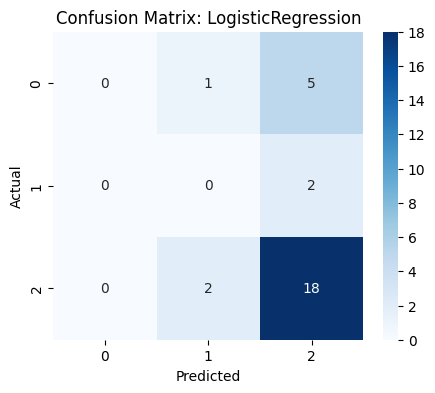


=== Model: DecisionTree ===
Accuracy: 0.7142857142857143
              precision    recall  f1-score   support

           0     0.6667    0.6667    0.6667         6
           1     0.0000    0.0000    0.0000         2
           2     0.8000    0.8000    0.8000        20

    accuracy                         0.7143        28
   macro avg     0.4889    0.4889    0.4889        28
weighted avg     0.7143    0.7143    0.7143        28



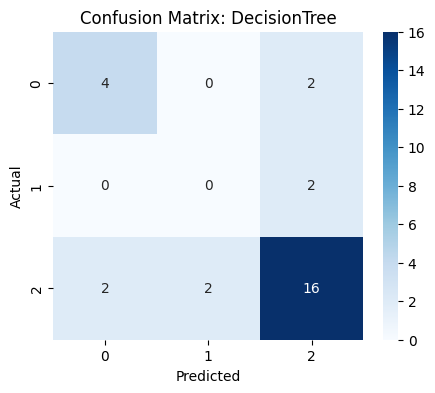


=== Model: RandomForest ===
Accuracy: 0.8571428571428571
              precision    recall  f1-score   support

           0     1.0000    0.6667    0.8000         6
           1     0.0000    0.0000    0.0000         2
           2     0.8333    1.0000    0.9091        20

    accuracy                         0.8571        28
   macro avg     0.6111    0.5556    0.5697        28
weighted avg     0.8095    0.8571    0.8208        28



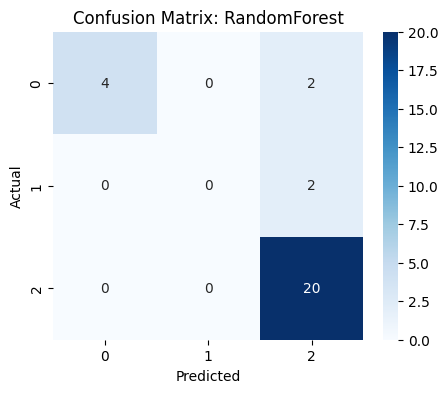


=== Model: ExtraTrees ===
Accuracy: 0.7142857142857143
              precision    recall  f1-score   support

           0     1.0000    0.1667    0.2857         6
           1     0.0000    0.0000    0.0000         2
           2     0.7917    0.9500    0.8636        20

    accuracy                         0.7143        28
   macro avg     0.5972    0.3722    0.3831        28
weighted avg     0.7798    0.7143    0.6781        28



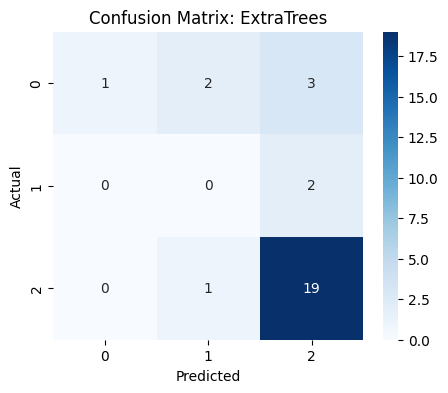


=== Model: GradientBoosting ===
Accuracy: 0.8214285714285714
              precision    recall  f1-score   support

           0     1.0000    0.8333    0.9091         6
           1     0.0000    0.0000    0.0000         2
           2     0.9000    0.9000    0.9000        20

    accuracy                         0.8214        28
   macro avg     0.6333    0.5778    0.6030        28
weighted avg     0.8571    0.8214    0.8377        28



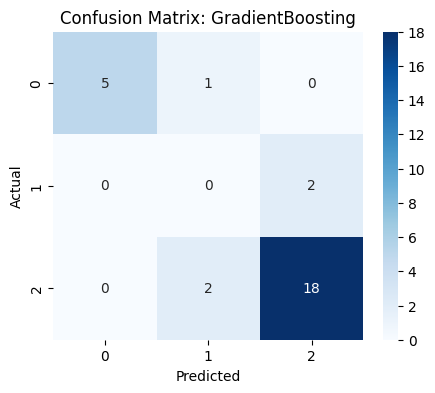


=== Model: AdaBoost ===
Accuracy: 0.6428571428571429
              precision    recall  f1-score   support

           0     1.0000    0.3333    0.5000         6
           1     0.0000    0.0000    0.0000         2
           2     0.7273    0.8000    0.7619        20

    accuracy                         0.6429        28
   macro avg     0.5758    0.3778    0.4206        28
weighted avg     0.7338    0.6429    0.6514        28



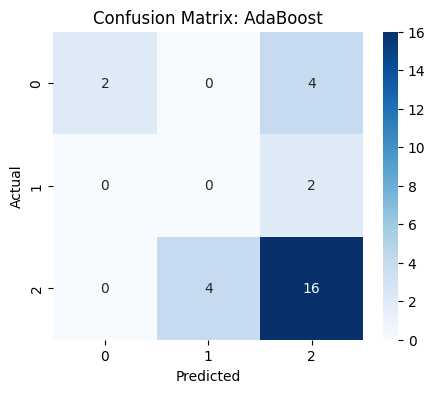


=== Model: KNN ===
Accuracy: 0.7142857142857143
              precision    recall  f1-score   support

           0     0.0000    0.0000    0.0000         6
           1     0.0000    0.0000    0.0000         2
           2     0.7143    1.0000    0.8333        20

    accuracy                         0.7143        28
   macro avg     0.2381    0.3333    0.2778        28
weighted avg     0.5102    0.7143    0.5952        28



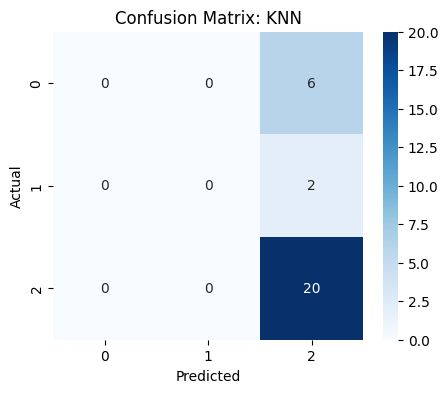


=== Model: SVM ===
Accuracy: 0.7142857142857143
              precision    recall  f1-score   support

           0     0.0000    0.0000    0.0000         6
           1     0.0000    0.0000    0.0000         2
           2     0.7143    1.0000    0.8333        20

    accuracy                         0.7143        28
   macro avg     0.2381    0.3333    0.2778        28
weighted avg     0.5102    0.7143    0.5952        28



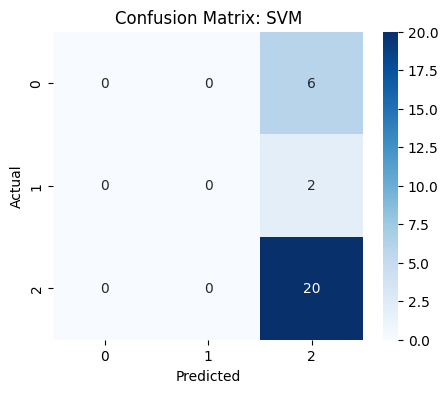


=== Model: NaiveBayes ===
Accuracy: 0.39285714285714285
              precision    recall  f1-score   support

           0     0.2727    1.0000    0.4286         6
           1     0.0000    0.0000    0.0000         2
           2     0.8333    0.2500    0.3846        20

    accuracy                         0.3929        28
   macro avg     0.3687    0.4167    0.2711        28
weighted avg     0.6537    0.3929    0.3666        28



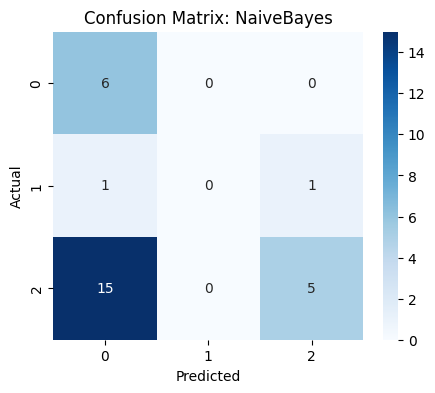


=== Model: XGBoost ===
Accuracy: 0.8571428571428571
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000         6
           1     0.0000    0.0000    0.0000         2
           2     0.9000    0.9000    0.9000        20

    accuracy                         0.8571        28
   macro avg     0.6333    0.6333    0.6333        28
weighted avg     0.8571    0.8571    0.8571        28



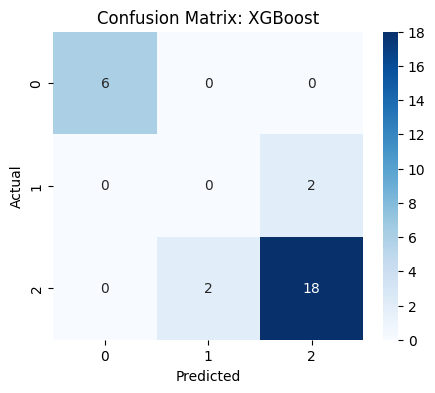

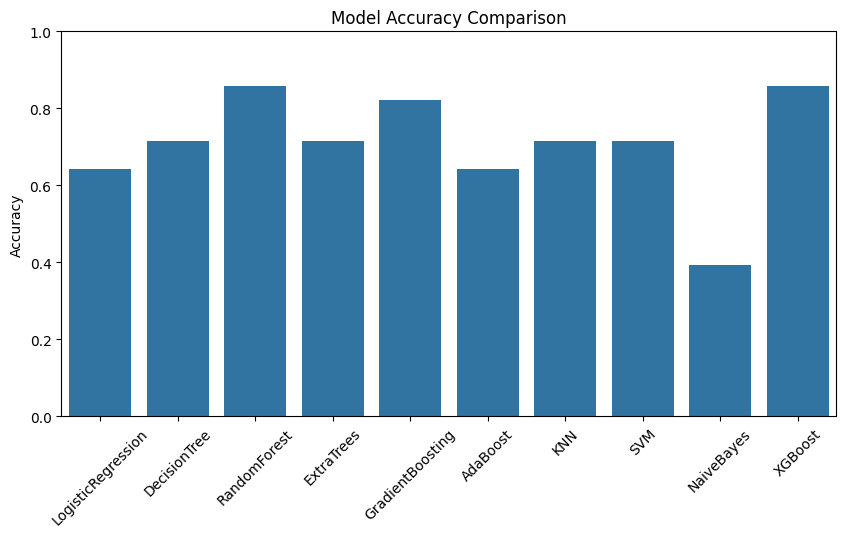


=== Summary Accuracies ===
RandomForest    : 0.8571
XGBoost         : 0.8571
GradientBoosting : 0.8214
DecisionTree    : 0.7143
ExtraTrees      : 0.7143
KNN             : 0.7143
SVM             : 0.7143
LogisticRegression : 0.6429
AdaBoost        : 0.6429
NaiveBayes      : 0.3929

Saved results under folder: supervised_results


In [5]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
import warnings
warnings.filterwarnings("ignore")

INPATH = "/content/academic Stress level - maintainance 1 (1).csv"
RANDOM_STATE = 42

# Load and clean data
def load_and_clean(path):
    df = pd.read_csv(path)
    df.columns = [c.strip() for c in df.columns]
    return df

# Basic preprocessing
def basic_preprocess(df):
    df = df.dropna(axis=1, how="all")
    target_col = None
    for candidate in ['stress','Stress','stress_level','StressLevel','Stress_Level','target','label']:
        if candidate in df.columns:
            target_col = candidate
            break
    if target_col is None:
        for col in df.columns:
            if df[col].nunique() <= 5:
                target_col = col
                break
    if target_col is None:
        raise ValueError("Unable to identify target column automatically.")
    X = df.drop(columns=[target_col]).copy()
    y_raw = df[target_col].copy()
    for c in X.select_dtypes(include=['object']).columns:
        X[c] = X[c].astype(str).str.strip().replace({'': np.nan, 'nan': np.nan})
    if y_raw.dtype == 'O' or not np.issubdtype(y_raw.dtype, np.number):
        le = LabelEncoder()
        y = le.fit_transform(y_raw.astype(str))
    else:
        if y_raw.nunique() > 6:
            y = pd.qcut(y_raw, q=3, labels=False, duplicates='drop')
            y = y.astype(int).values
        else:
            y = y_raw.astype(int).values
    return X, y, target_col

# Feature engineering
def feature_engineer(X):
    X2 = X.copy()
    for c in X2.columns:
        if X2[c].dtype == 'O':
            cleaned = X2[c].astype(str).str.replace(r'[^0-9.\-]', '', regex=True)
            nonempty = cleaned.replace('', np.nan).dropna()
            try:
                conv = pd.to_numeric(nonempty, errors='coerce')
                pct_numeric = conv.notna().sum() / max(1, len(nonempty))
            except Exception:
                pct_numeric = 0
            if pct_numeric > 0.6:
                X2[c] = pd.to_numeric(cleaned, errors='coerce')
    if 'study_hours' in X2.columns and 'sleep_hours' in X2.columns:
        X2['study_sleep_ratio'] = X2['study_hours'] / (X2['sleep_hours'] + 1e-6)
    if 'assignments' in X2.columns and 'study_hours' in X2.columns:
        X2['assign_per_study'] = X2['assignments'] / (X2['study_hours'] + 1e-6)
    return X2

# Pipeline and split
def prepare_pipeline_and_split(X, y, test_size=0.2):
    X_proc = X.copy()
    low_card_cols = [c for c in X_proc.select_dtypes(include=['object','category']).columns if X_proc[c].nunique() <= 20]
    if low_card_cols:
        X_proc = pd.get_dummies(X_proc, columns=low_card_cols, dummy_na=True)
    high_card_cols = [c for c in X_proc.select_dtypes(include=['object','category']).columns if c not in low_card_cols]
    X_proc = X_proc.drop(columns=high_card_cols)
    for c in X_proc.columns:
        if X_proc[c].dtype.kind in 'biufc':
            X_proc[c] = X_proc[c].fillna(X_proc[c].median())
        else:
            X_proc[c] = X_proc[c].fillna(0)
    X_matrix = X_proc.values.astype(float)
    X_train, X_test, y_train, y_test = train_test_split(
        X_matrix, y, test_size=test_size, stratify=y, random_state=RANDOM_STATE
    )
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    return X_train_scaled, X_test_scaled, y_train, y_test, scaler, X_proc.columns.tolist()

# Run models and plot graphs
def run_models(X_train, X_test, y_train, y_test):
    models = {
        "LogisticRegression": LogisticRegression(max_iter=1000, random_state=RANDOM_STATE),
        "DecisionTree": DecisionTreeClassifier(random_state=RANDOM_STATE),
        "RandomForest": RandomForestClassifier(n_estimators=300, random_state=RANDOM_STATE),
        "ExtraTrees": ExtraTreesClassifier(n_estimators=200, random_state=RANDOM_STATE),
        "GradientBoosting": GradientBoostingClassifier(n_estimators=300, random_state=RANDOM_STATE),
        "AdaBoost": AdaBoostClassifier(n_estimators=200, random_state=RANDOM_STATE),
        "KNN": KNeighborsClassifier(n_neighbors=7),
        "SVM": SVC(kernel='rbf', probability=False, random_state=RANDOM_STATE),
        "NaiveBayes": GaussianNB()
    }
    results = {}
    reports = {}
    cms = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        preds = model.predict(X_test)
        acc = accuracy_score(y_test, preds)
        results[name] = acc
        reports[name] = classification_report(y_test, preds, output_dict=True)
        cms[name] = confusion_matrix(y_test, preds)
        print("\n=== Model:", name, "===")
        print("Accuracy:", acc)
        print(classification_report(y_test, preds, digits=4))

        # Plot confusion matrix
        plt.figure(figsize=(5,4))
        sns.heatmap(cms[name], annot=True, fmt='d', cmap='Blues')
        plt.title(f'Confusion Matrix: {name}')
        plt.ylabel('Actual')
        plt.xlabel('Predicted')
        plt.show()

    try:
        from xgboost import XGBClassifier
        xgb = XGBClassifier(n_estimators=300, use_label_encoder=False, eval_metric='mlogloss', random_state=RANDOM_STATE)
        xgb.fit(X_train, y_train)
        preds = xgb.predict(X_test)
        acc = accuracy_score(y_test, preds)
        results['XGBoost'] = acc
        reports['XGBoost'] = classification_report(y_test, preds, output_dict=True)
        cms['XGBoost'] = confusion_matrix(y_test, preds)
        print("\n=== Model: XGBoost ===")
        print("Accuracy:", acc)
        print(classification_report(y_test, preds, digits=4))

        plt.figure(figsize=(5,4))
        sns.heatmap(cms['XGBoost'], annot=True, fmt='d', cmap='Blues')
        plt.title('Confusion Matrix: XGBoost')
        plt.ylabel('Actual')
        plt.xlabel('Predicted')
        plt.show()

    except Exception:
        pass

    # Plot accuracies
    plt.figure(figsize=(10,5))
    sns.barplot(x=list(results.keys()), y=list(results.values()))
    plt.ylabel("Accuracy")
    plt.ylim(0, 1)
    plt.xticks(rotation=45)
    plt.title("Model Accuracy Comparison")
    plt.show()

    return results, reports, cms

# Main function
def main():
    df = load_and_clean(INPATH)
    X, y, target_col = basic_preprocess(df)
    X_fe = feature_engineer(X)
    X_train, X_test, y_train, y_test, scaler, feature_names = prepare_pipeline_and_split(X_fe, y)
    results, reports, cms = run_models(X_train, X_test, y_train, y_test)

    print("\n=== Summary Accuracies ===")
    for k, v in sorted(results.items(), key=lambda kv: kv[1], reverse=True):
        print(f"{k:15s} : {v:.4f}")

    out_dir = "supervised_results"
    os.makedirs(out_dir, exist_ok=True)
    pd.DataFrame.from_dict(results, orient='index', columns=['accuracy']).to_csv(os.path.join(out_dir, "accuracy_summary.csv"))
    for model_name, rep in reports.items():
        rep_df = pd.DataFrame(rep).transpose()
        rep_df.to_csv(os.path.join(out_dir, f"classification_report_{model_name}.csv"))
    for model_name, cm in cms.items():
        cm_df = pd.DataFrame(cm)
        cm_df.to_csv(os.path.join(out_dir, f"confusion_matrix_{model_name}.csv"))
    print("\nSaved results under folder:", out_dir)

if __name__ == "__main__":
    main()
